## Analyse der WIFI-Hotspots in Linz 

*Ein Point-Pattern-Analyse von Lukas Boeck, 1710277054*

### 1. Import der Daten in pd.DataFrame

In [1]:
import pandas as pd 

df = pd.read_csv("data/hotspots_linz.csv", encoding="Latin-1", delimiter=";")
print("Länge des Df: ", len(df))
df.head()

Länge des Df:  127


,Nummer,Latitude,Longitude,Name,Kurztext,Start im Jahr,Ende im Jahr,Stadt,Postleitzahl,Straße,Homepage
0,1986.0,"48,271009","14,282784",Hotspot Linz - Volkshaus Keferfeld/Oed,Hier ist nur einer von vielen Hotspot-Standort...,2006.0,0.0,Linz,4020.0,Landwiedstraße 65,http://www.hotspotlinz.at
1,1987.0,"48,258039","14,360809",Hotspot Linz - Volkshaus Pichling,Hier ist nur einer von vielen Hotspot-Standort...,2006.0,0.0,Linz,4030.0,Lunaplatz 4,http://www.hotspotlinz.at
2,1988.0,"48,297156","14,296327",Hotspot Linz - Kunstraum Goethestraße,Hier ist nur einer von vielen Hotspot-Standort...,2008.0,0.0,Linz,4020.0,Goethestraße 30,http://www.hotspotlinz.at
3,1989.0,"48,290861","14,285444",Hotspot Linz - Bergschlößl-Park,Hier ist nur einer von vielen Hotspot-Standort...,2007.0,0.0,Linz,4020.0,Bergschlößlgasse 2,http://www.hotspotlinz.at
4,1990.0,"48,296632","14,297719",Hotspot Linz - Jugendwohngemeinschaft SISAL,Hier ist nur einer von vielen Hotspot-Standort...,2008.0,0.0,Linz,4020.0,Schubertstraße 45,http://www.hotspotlinz.at


### 2. Cleaning der Columns

<br> 
**2a) Null-Values** 

*Die letzten drei Zeilen sind zu reinigen, da NaN.*

In [2]:
#Nicht existente Daten (NaN) 
for col in df.columns: 
    print("{}:".format(col), df[col].isnull().sum())

Nummer: 3
Latitude: 3
Longitude: 3
Name: 3
Kurztext: 3
Start im Jahr: 3
Ende im Jahr: 3
Stadt: 3
Postleitzahl: 3
Straße: 2
Homepage: 3


In [3]:
df.tail()

,Nummer,Latitude,Longitude,Name,Kurztext,Start im Jahr,Ende im Jahr,Stadt,Postleitzahl,Straße,Homepage
122,4006.0,"48,294114","14,276918",Hotspot Linz - Linzer Stadion - (Aussenbereich),Hier ist nur einer von vielen Hotspot-Standort...,2012.0,0.0,Linz,4020.0,Roseggerstraße 41,http://www.hotspotlinz.at
123,4007.0,"48,304793","14,299414",Hotspot Linz - Rotes Kreuz Zentrale,Hier ist nur einer von vielen Hotspot-Standort...,2013.0,0.0,Linz,4020.0,Körnerstraße 28,http://www.hotspotlinz.at
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,NaN


In [4]:
df.dropna(inplace=True)
print("Länge des Df: ", len(df))

Länge des Df:  124


<br> 
**2b) Kurztext & Homepage** 

*Die Columns "Kurztext" und "Homepage" sind für alle Zeilen gleich und bringen daher für die Analyse keinen Mehrwert.*

In [5]:
#Explore Kurztext / Homepage
print(df["Kurztext"].value_counts())
print(df["Homepage"].value_counts())

Hier ist nur einer von vielen Hotspot-Standorten in Linz, an dem gratis gesurft werden kann. Der Ausbau der Hotspots mit kosten- und drahtlosem Internetzugang wird vom Kabelnetzbetreiber LIWEST auf Initiative der Stadt Linz betrieben.    124
Name: Kurztext, dtype: int64
http://www.hotspotlinz.at    124
Name: Homepage, dtype: int64


In [6]:
del df["Kurztext"]
del df["Homepage"]
df.head()

,Nummer,Latitude,Longitude,Name,Start im Jahr,Ende im Jahr,Stadt,Postleitzahl,Straße
0,1986.0,"48,271009","14,282784",Hotspot Linz - Volkshaus Keferfeld/Oed,2006.0,0.0,Linz,4020.0,Landwiedstraße 65
1,1987.0,"48,258039","14,360809",Hotspot Linz - Volkshaus Pichling,2006.0,0.0,Linz,4030.0,Lunaplatz 4
2,1988.0,"48,297156","14,296327",Hotspot Linz - Kunstraum Goethestraße,2008.0,0.0,Linz,4020.0,Goethestraße 30
3,1989.0,"48,290861","14,285444",Hotspot Linz - Bergschlößl-Park,2007.0,0.0,Linz,4020.0,Bergschlößlgasse 2
4,1990.0,"48,296632","14,297719",Hotspot Linz - Jugendwohngemeinschaft SISAL,2008.0,0.0,Linz,4020.0,Schubertstraße 45


#### 2c) Ende im Jahr

*Die Column "Ende im Jahr" zeigt, dass ein Hotspot nicht mehr aktiv ist. Da wir uns nur mit aktuellen Hotspots beschäftigen wollen, wird dieser aus dem Datensatz entfernt.*

In [7]:
print(df["Ende im Jahr"].value_counts())
df = df[df["Ende im Jahr"] == 0]
df.reset_index(inplace = True, drop = True)
len(df)

0.0       123
2011.0      1
Name: Ende im Jahr, dtype: int64


123

#### 2d) Lat/Lon to Numeric

*Die Columns "Latitude" und "Longitude" werden noch nicht als numerisch erkannt, was in folgender Zelle bereinigt wird.*

In [7]:
df["Latitude"] = df["Latitude"].str.replace(',', '.').astype(float)
df["Longitude"] = df["Longitude"].str.replace(',', '.').astype(float)
df.head()

,Nummer,Latitude,Longitude,Name,Start im Jahr,Ende im Jahr,Stadt,Postleitzahl,Straße
0,1986.0,48.271009,14.282784,Hotspot Linz - Volkshaus Keferfeld/Oed,2006.0,0.0,Linz,4020.0,Landwiedstraße 65
1,1987.0,48.258039,14.360809,Hotspot Linz - Volkshaus Pichling,2006.0,0.0,Linz,4030.0,Lunaplatz 4
2,1988.0,48.297156,14.296327,Hotspot Linz - Kunstraum Goethestraße,2008.0,0.0,Linz,4020.0,Goethestraße 30
3,1989.0,48.290861,14.285444,Hotspot Linz - Bergschlößl-Park,2007.0,0.0,Linz,4020.0,Bergschlößlgasse 2
4,1990.0,48.296632,14.297719,Hotspot Linz - Jugendwohngemeinschaft SISAL,2008.0,0.0,Linz,4020.0,Schubertstraße 45


#### 2e) Untersuchung auf Duplicates

In [8]:
df[df.duplicated(subset=["Name", "Latitude", "Longitude"])]

,Nummer,Latitude,Longitude,Name,Start im Jahr,Ende im Jahr,Stadt,Postleitzahl,Straße
8,1994.0,48.322152,14.277273,Hotspot Linz - ABC Bewegungscenter,2008.0,0.0,Linz,4040.0,Hölderlinstraße 26
20,2006.0,48.290614,14.291216,Hotspot Linz - Hauptbahnhof - Halle,2006.0,0.0,Linz,4020.0,Bahnhofplatz 3-6
23,2010.0,48.292417,14.275634,Hotspot Linz - Tipps-Arena Linz,2008.0,0.0,Linz,4020.0,Ziegeleistraße 76
24,2011.0,48.292417,14.275634,Hotspot Linz - Tipps-Arena Linz,2008.0,0.0,Linz,4020.0,Ziegeleistraße 76
92,3005.0,48.252941,14.313121,Hotspot Linz - Volkshaus Kleinmünchen,2008.0,0.0,Linz,4030.0,Dauphinestraße 19
104,3018.0,48.300641,14.294288,Hotspot Linz - Hessenplatz,2008.0,0.0,Linz,4020.0,Hessenplatz
110,3023.0,48.306386,14.283196,Hotspot Linz - Atelierhaus Salzamt,2009.0,0.0,Linz,4020.0,Obere Donaulände 15
119,4003.0,48.293509,14.275965,Hotspot Linz - Linzer Stadion - (Aussenbereich),2012.0,0.0,Linz,4020.0,Roseggerstraße 41
121,4005.0,48.293341,14.276232,Hotspot Linz - Linzer Stadion - (Aussenbereich),2012.0,0.0,Linz,4020.0,Roseggerstraße 41


In [9]:
df = df[df.duplicated(subset=["Name", "Latitude", "Longitude"]) == False]
len(df)

115

Die Pandas df.duplicated Funktion liefert die Möglichkeit Duplicates anhand eines Subsets an Columns herauszufinden. Dabei kann über den Parameter 'keep' festgelegt werden, ob der erste oder letzte Eintrag als Nicht-Duplicate behalten werden soll (Default: *keep = "first"*).

In unserem Beispiel **erkennen wir 9 Duplicates anhand von Lat/Lon & Name**. Das könnte darauf hindeuten, dass am selben Standort zwei Hotspots zu Verfügung stehen. Für unsere Analyse entscheiden wir uns aber diese zu bereinigen, da wir uns mit den Unique Standorten befassen möchten. Die Länge des DataFrames reduziert sich damit auf 114. 

### 3. Exploration 

Ein erster Scatterplot anhand von Lat/Lon gibt einen Überblick über die räumliche Verteilung der Daten.

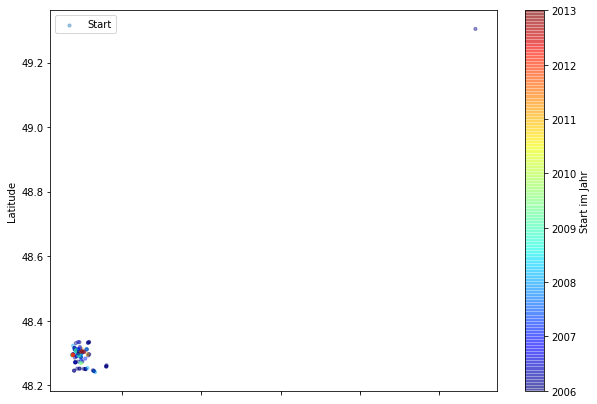

In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline

df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=10, label="Start",
    c="Start im Jahr", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

#### Ausreißererkennung

*In Hinblick auf den Ausreißer im Nordosten dürfte ein Fehler in den Daten vorliegen. Die Dametzstraße 23 (= Stadtmuseum Linz) liegt nach Recherche auf Google Maps direkt im Zentrum von Linz (Koordinaten: 48.304020, 14.291194). Offensichtlich wurde sowohl bei Lat, als auch Lon der Index um 1 verschoben. Dies wird daher korrigiert.*

In [11]:
df[df["Latitude"] > 49]

,Nummer,Latitude,Longitude,Name,Start im Jahr,Ende im Jahr,Stadt,Postleitzahl,Straße
97,3010.0,49.304113,15.291449,"Hotspot Linz - Nordico - Stadtmuseum Linz, ges...",2006.0,0.0,Linz,4020.0,Dametzstraße 23


In [12]:
lat = 48.304113
lon = 14.291449

df["Latitude"].replace(49.304113, 48.304113, inplace=True)
df["Longitude"].replace(15.291449, 14.291449, inplace=True)

- Der erste Plot bringt neben Lat/Lon noch anhand der Farbe noch das Datum der Errichtung ins Spiel (je mehr rot, desto später errichtet). 
- Im zweiten Plot wird sich des Pakets "Folium" bedient, um die Punkte auf eine Karte zu projezieren. 

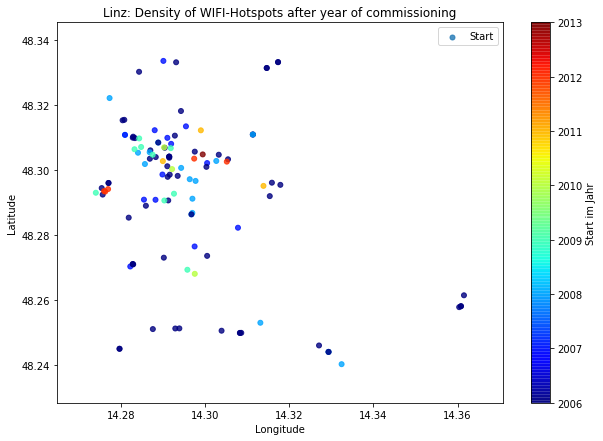

In [13]:
df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=25, label="Start", sharex=False,
    c="Start im Jahr", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.8, figsize=(10,7),
)
plt.title("Linz: Density of WIFI-Hotspots after year of commissioning")
plt.legend()
plt.show()

In [14]:
import folium

#Center Coordinates
linz = [48.29, 14.32]

# Build map 
map_linz = folium.Map(location=linz, zoom_start=12, tiles='cartodbpositron', width=640, height=480)

for lat,lon in zip(df["Longitude"], df["Latitude"]):
    folium.CircleMarker([lon,lat], radius=2, color="darkblue").add_to(map_linz)

map_linz

*Die erste visuelle Analyse liefert einige Einblicke:*
- Die Punktedichte scheint im Zentrum von Linz zu steigen. 
- Generell scheint die Puntkedichte auch neben dem direkten Zentrum gebündelt, d.h. viele dicht aneinanderliegende Punkte / Clusterungen. Dies lässt sich zB anhand der Karte im Stadtteil "Dornach" sowie in der Clusterung zwischen "Freinberg" und "Froschberg" beobachten.
- Zwischen den einzelnen Clustern außerhalb des Zentrums liegen deutliche Distanzen.

### 4. Dichteschätzung

#### Kernel Density Estimation (KDE)

In [15]:
latlon =  df["Longitude"].values, df["Latitude"].values
latlon

(array([14.282784, 14.360809, 14.296327, 14.285444, 14.297719, 14.286977,
        14.286848, 14.277273, 14.291464, 14.305433, 14.280367, 14.277019,
        14.277019, 14.292791, 14.291572, 14.279636, 14.327064, 14.294244,
        14.291216, 14.286804, 14.275634, 14.287558, 14.282191, 14.296944,
        14.296731, 14.314636, 14.308262, 14.290375, 14.282784, 14.329328,
        14.303896, 14.317872, 14.300464, 14.307797, 14.300465, 14.290065,
        14.285672, 14.280774, 14.293462, 14.285905, 14.280932, 14.302639,
        14.284028, 14.28984 , 14.288841, 14.288841, 14.2754  , 14.290997,
        14.291908, 14.282785, 14.311335, 14.311335, 14.311335, 14.317321,
        14.315863, 14.361522, 14.360387, 14.308262, 14.317321, 14.329328,
        14.297488, 14.292894, 14.360809, 14.297527, 14.279636, 14.332432,
        14.300294, 14.288253, 14.296969, 14.280935, 14.288   , 14.303232,
        14.29017 , 14.314636, 14.329328, 14.293092, 14.315354, 14.281822,
        14.284284, 14.296731, 14.29386

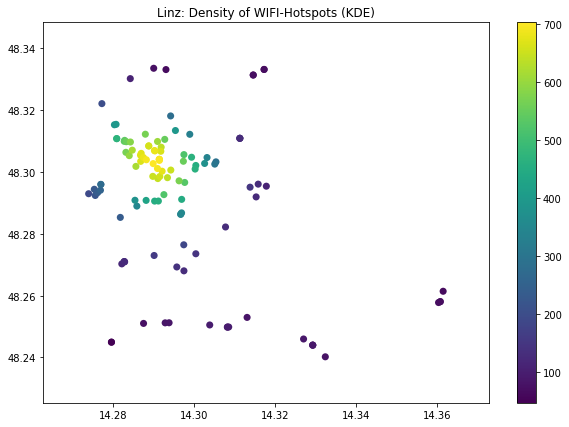

In [16]:
from scipy.stats import gaussian_kde
from pylab import *


# Punktedichte berechnen
xy = np.vstack([latlon[0],latlon[1]])
z = gaussian_kde(xy)(xy)

#Sortierung, um die dichtesten Punkte als letzter zu plotten
idx = z.argsort()
x, y, z = latlon[0][idx], latlon[1][idx], z[idx]

#Plotten
plt.subplots(figsize=(10,7))
s = scatter(x, y, c=z, s=50, edgecolor='')
colorbar(s)
title("Linz: Density of WIFI-Hotspots (KDE)")
show()

Eine erste Dichteschätzung nach der Standard Gauß'schen Kernel Density Estimation ergibt - wie zu erwarten - einen Anstieg der Dichte im Zentrum der Stadt Linz. 

Bei einer Fläche von 96km2 (offizielle Statistik nach https://www.linz.at/zahlen/010_Stadtgebiet/015_Flaechen/) ergeben sich **~ 1.19 Hotspots per Quadratkilometer**. 

#### Quadratzählmethode

In [18]:
#Import von Scipy, Numpy und Pointpats 
import scipy.spatial
import libpysal as ps
import numpy as np
from pointpats.pointpattern import PointPattern
import pointpats.quadrat_statistics as qs

In [19]:
pp_list = []

for lat,lon in zip(latlon[0],latlon[1]): 
    pp_list.append([lat,lon])

pp_array = np.array(pp_list)
pp_array[:5]

array([[14.282784, 48.271009],
       [14.360809, 48.258039],
       [14.296327, 48.297156],
       [14.285444, 48.290861],
       [14.297719, 48.296632]])

In [20]:
pp = PointPattern(pp_array)
pp

In [21]:
pp.summary()

Point Pattern
114 points
Bounding rectangle [(14.274006,48.240183), (14.361522,48.333595)]
Area of window: 0.008175044592000136
Intensity estimate for window: 13944.878063608012
           x          y
0  14.282784  48.271009
1  14.360809  48.258039
2  14.296327  48.297156
3  14.285444  48.290861
4  14.297719  48.296632


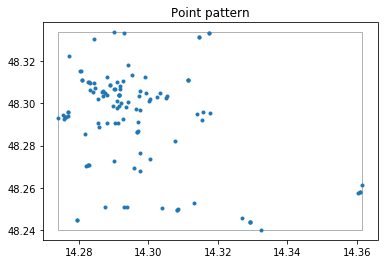

In [22]:
pp.plot(window= True, title= "Point pattern")

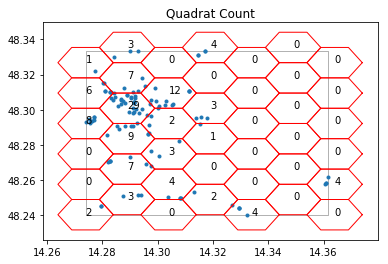

In [23]:
q_h = qs.QStatistic(pp,shape= "hexagon",lh = 0.01)

q_h.plot()

In [24]:
print("Chi2: {}, bei {} Freiheitsgraden: P-Wert: {}".format(q_h.chi2, q_h.df, q_h.chi2_pvalue))

Chi2: 393.68421052631567, bei 41 Freiheitsgraden: P-Wert: 3.6308273206966e-59


Auch die **Quadratzählmethode bestätigt** bei ersten Durchlauf die **Bündelung / Clusterung der Punkte**. Der hochsignifikante P-Wert des Chi2-Tests lässt uns die Nullhypothese ablehnen, dass die Punkte zufallsverteilt sind. 

In der ersten Darstellung über die Hexagone können auch die bereits oben erwähnten Clustungen außerhalb des Stadtzentrums erkannt werden (zB das Hexagon mit dem Wert 8 im Bereich 48.30-48.32 & 14.26-14.285 entspricht "Freinberg" / "Froschberg"; die vier Punkte ganz im Osten etc.).

#### Quadratzählmethode: adaptiert

Das verwendete Paket 'Pointpats' liefert die Quadratzählmethode ausschließlich mit der Umschließung der Punkte in einem Minimum Bounding Rectangle. Um diese den tatsächlichen Stadtgrenzen anzunährern, werden im Folgenden die Punkte über Lat 14.322 herausgenommen und der Prozess nochmals durchlaufen.  

In [25]:
import scipy.spatial
import libpysal as ps
import numpy as np
from pointpats.pointpattern import PointPattern
import pointpats.quadrat_statistics as qs

In [26]:
pp_array_new = pp_array[((pp_array[:,0] < 14.322))]

In [27]:
pp_juv = PointPattern(pp_array_new)
pp_juv

In [28]:
pp_juv.summary()

Point Pattern
105 points
Bounding rectangle [(14.274006,48.244927), (14.317872,48.333595)]
Area of window: 0.0038895104880001252
Intensity estimate for window: 26995.685015876636
           x          y
0  14.282784  48.271009
1  14.296327  48.297156
2  14.285444  48.290861
3  14.297719  48.296632
4  14.286977  48.306047


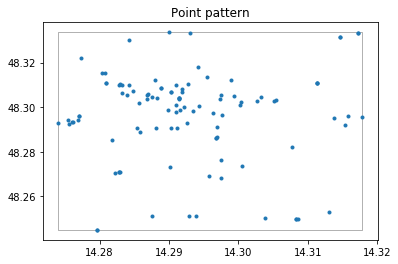

In [29]:
pp_juv.plot(window= True, title= "Point pattern")

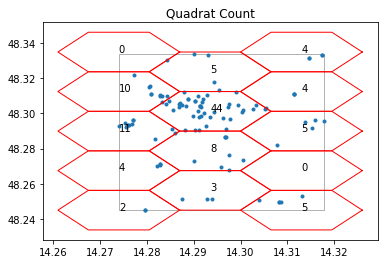

In [30]:
q_h = qs.QStatistic(pp_juv,shape= "hexagon", lh=0.013)
q_h.plot()

In [31]:
print("Chi2: {}, bei {} Freiheitsgraden: P-Wert: {}".format(q_h.chi2, q_h.df, q_h.chi2_pvalue))

Chi2: 209.26666666666665, bei 12 Freiheitsgraden: P-Wert: 1.7001958878813306e-37


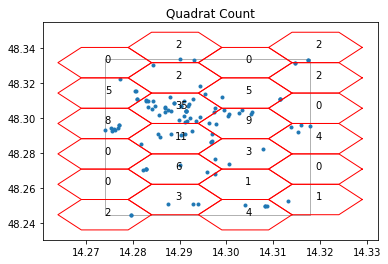

In [32]:
q_h = qs.QStatistic(pp_juv,shape= "hexagon", lh=0.010)
plt.figure(figsize=(10,4))
q_h.plot()

In [33]:
print("Chi2: {}, bei {} Freiheitsgraden: P-Wert: {}".format(q_h.chi2, q_h.df, q_h.chi2_pvalue))

Chi2: 271.9142857142857, bei 23 Freiheitsgraden: P-Wert: 2.0624354458015005e-44


In der QStatistic-Funktion kann man nun den Parameter "lh" entsprechend der  Länge der Hexagone anpassen. Auch im "herangezoomten" Bereich des Stadtzentrums zeigt sich die klare Zentrierung der Punkte sowie der hochsignifikante P-Wert. 

### 5. Distanzbasierte Messungen 

Für die distanzbasierten Metriken der $G$, $F$ und $K$ Funktionen wird nun jeweils der originale Datensatz links sowie der adaptierte Datensatz mit Lat < 14.325 dargestellt:

In [34]:
from pointpats.process import PoissonPointProcess 
from pointpats.window import as_window
from pointpats.distance_statistics import G, F, K
from pointpats.distance_statistics import Genv, Fenv, Jenv, Kenv, Lenv

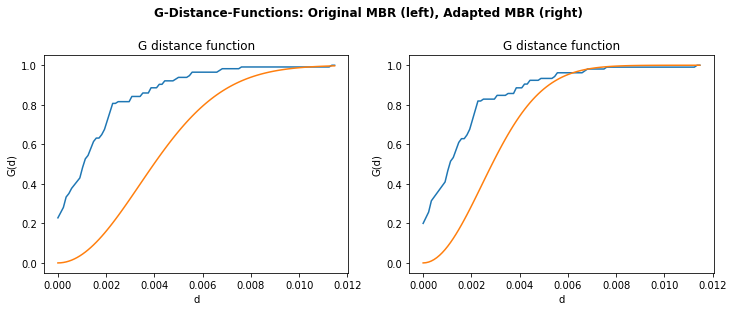

In [35]:
gp1 = G(pp, intervals=100)
gp2 = G(pp_juv, intervals=100)
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.suptitle("G-Distance-Functions: Original MBR (left), Adapted MBR (right)", y=1.05, fontweight="bold")
gp1.plot()
plt.subplot(1, 2, 2)
gp2.plot()

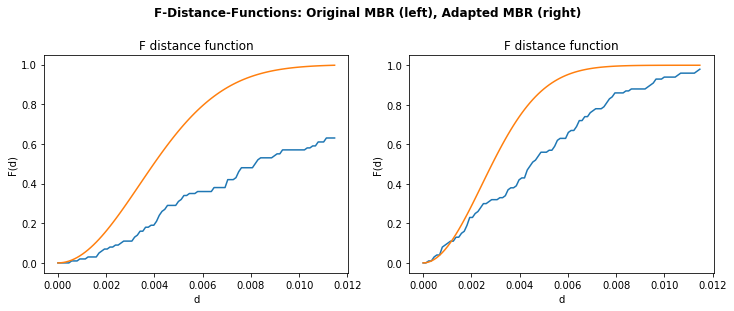

In [36]:
gp1 = F(pp, intervals=100)
gp2 = F(pp_juv, intervals=100)
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.suptitle("F-Distance-Functions: Original MBR (left), Adapted MBR (right)", y=1.05, fontweight="bold")
gp1.plot()
plt.subplot(1, 2, 2)
gp2.plot()

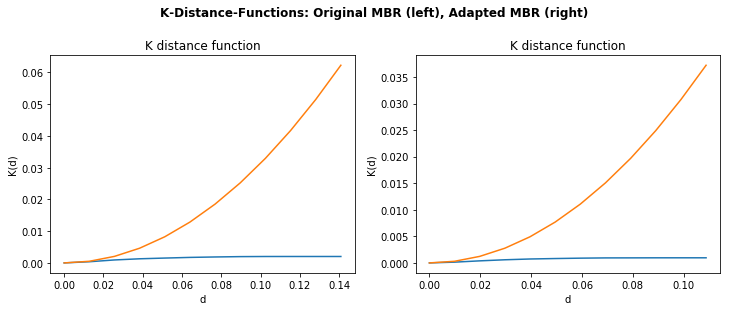

In [37]:
gp1 = K(pp)
gp2 = K(pp_juv)
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.suptitle("K-Distance-Functions: Original MBR (left), Adapted MBR (right)", y=1.05, fontweight="bold")
gp1.plot()
plt.subplot(1, 2, 2)
gp2.plot()

Alle sechs Verläufe, d.h. **$G$, $F$ und $K$ Funktion** sowohl mit ursprünglichen als auch adaptierten Daten, **deuten ebenfalls auf klare Clusterungen** hin. 

### 6. Distanzbasierte Messungen mit Konfidenzintervallen 

Das Paket *Pointpats* liefert darüber hinaus noch die Möglichkeit anhand von mehreren Realiserungen einer räumlichen Zufallsverteilung (=CSR, Complete Spatial Randomness) ein **Konfidenzintervall über die einzelnen Kurvenverläufe** zu legen. Die entstehenden Hüllen werden im Paket als "Simulation Envelopes" bezeichnet. Dadurch kann eine klarere Aussage erfolgen, inwieweit gewisse Verläufe statistisch signifikant sind und demnach nicht auf eine Zufallsverteilung hindeuten. 

- CSR steht in den Grafiken für den zu erwartenden Verlauf bei einer Zufallsverteilung. 
- UB und LB stehen dabei für "Upper Border" sowie "Lower Border", d.h. für die Grenzen des Konfidenzintervalls. 

In [38]:
#Original 
realizations1 = PoissonPointProcess(pp.window, pp.n, 100, asPP=True) # simulate CSR 100 times
genv1 = Genv(pp, intervals=100, realizations=realizations1) # call Genv to generate simulation envelope
print(genv1)

#Adapted
realizations2 = PoissonPointProcess(pp_juv.window, pp_juv.n, 100, asPP=True) # simulate CSR 100 times
genv2 = Genv(pp_juv, intervals=100, realizations=realizations2) # call Genv to generate simulation envelope
print(genv1)

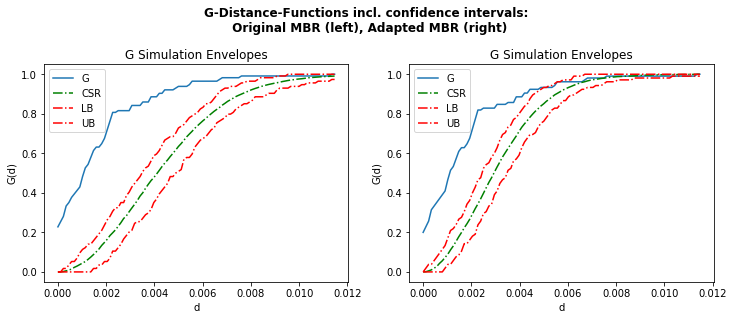

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.suptitle("G-Distance-Functions incl. confidence intervals: \n Original MBR (left), Adapted MBR (right)", y=1.08, fontweight="bold")
genv1.plot()
plt.subplot(1, 2, 2)
genv2.plot()

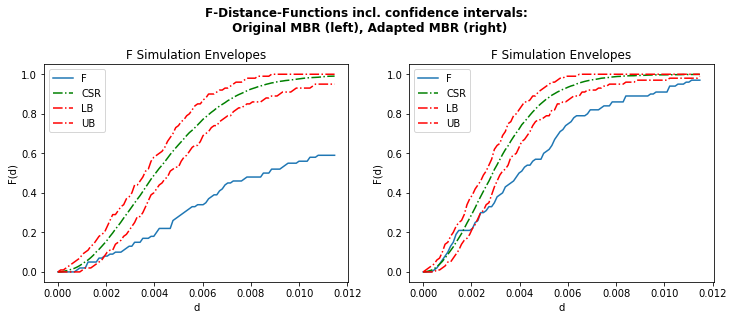

In [40]:
fenv1 = Fenv(pp, intervals=100, realizations=realizations1)
fenv2 = Fenv(pp_juv, intervals=100, realizations=realizations2)
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.suptitle("F-Distance-Functions incl. confidence intervals: \n Original MBR (left), Adapted MBR (right)", y=1.08, fontweight="bold")
fenv1.plot()
plt.subplot(1, 2, 2)
fenv2.plot()

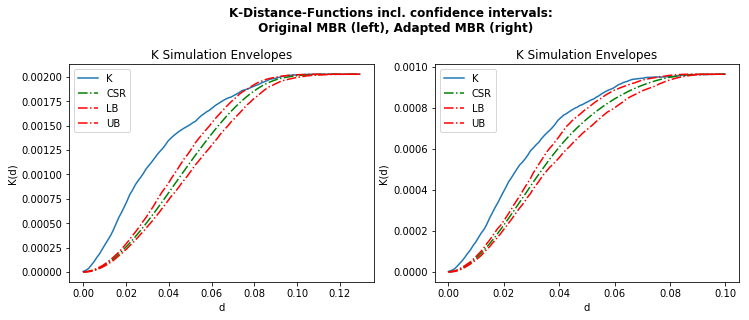

In [41]:
kenv1 = Kenv(pp, intervals=100, realizations=realizations1)
kenv2 = Kenv(pp_juv, intervals=100, realizations=realizations2)
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.suptitle("K-Distance-Functions incl. confidence intervals: \n Original MBR (left), Adapted MBR (right)", y=1.08, fontweight="bold")
kenv1.plot()
plt.subplot(1, 2, 2)
kenv2.plot()

Die bereits zu Beginn festgestellte Clusterung bestätigen sich nun auch in den obigen Grafiken. **In allen 6 Grafiken liegen die Daten klar außerhalb der für CSR typischen Verläufe.** Im adaptieren Datensatz sind die Verläufe näher an einer Zufallsverteilung, da viel leere Fläche nicht als Stadtgebiet in die CSR einfließen. Die Nullhypothese, dass die Punkte zufallsverteilt sind, wird dennoch einmal mehr verworfen. 

### 7. Fazit

Das Paket *Pointpats* liefert einige sehr nützliche Funktionen, über die räumliche Daten analysiert werden können. Allerdings besteht die **wesentliche Einschränkung**, dass die zur Basis gelegten Objekte der *Point Patterns* **aussschließich via *Miminum Bounding Rectangles*** kalkuliert werden. Dies hat nicht nur auf die Quadratzählmethode Effekte, sondern auch auf die *Simulation Envelopes* zur Schätzung der CSR in einem gewissen Fenster. Eine Erweiterung des Pakets hin zu kovexen Hüllen oder Custom-Hülle (zB Stadtgrenze manuell einarbeiten), wäre hierbei sehr nützlich.  
<br>
<br>
<br>
<br>